# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

UPDATE THIS LINK:

https://github.com/h-hahn/eds220-hwk-1

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [2]:
# a. import pandas
import pandas as pd

In [3]:
# b. read in the data
raw_eqk = pd.read_csv('data/earthquake_data.csv')

In [4]:
# c. look at head of dataframe
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [6]:
# a. get shape of dataset (rows, columns)
print(raw_eqk.shape)

(120108, 8)


In [7]:
# b. get type of the dataset shape output
print(type(raw_eqk.shape))

<class 'tuple'>


In [8]:
# c. print only the number of rows in the tuple
print(raw_eqk.shape[0])

120108


## 3

Get the unique values of the type of events.

In [9]:
# unique values in the column 'type'
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [10]:
# a. select only earthquake events stored as eqk
eqk = raw_eqk[raw_eqk['type'] == 'earthquake']

In [11]:
# b. update the index of eqk to be the id column 
eqk.set_index('id', inplace = True)

In [12]:
# c. check first three rows
eqk.head(3)

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected only earthquake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [12]:
# subtract the amount of rows in the earthquake dataframe from the original dataframe
# look at number of events dropped from raw_eqk
raw_eqk.shape[0] - eqk.shape[0]

1710

**1710 events were left out of raw_eqk.**

# 6
Without creating any new variables, plot a histogram of the earthquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Earthquake Magnitudes'}, ylabel='Frequency'>

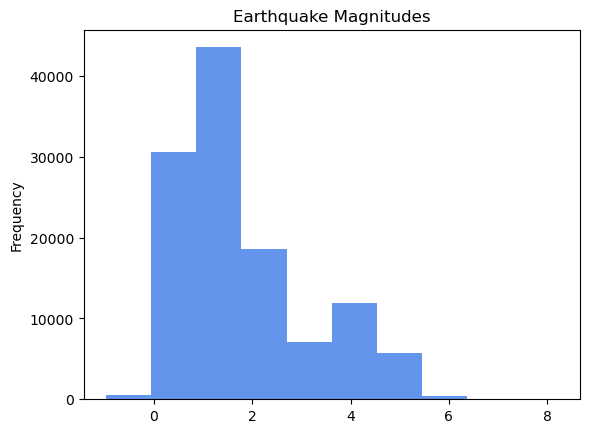

In [19]:
# plot a histogram
eqk.mag.plot(kind = 'hist', # type of graph is histogram
             title = 'Earthquake Magnitudes', # change title
             color = 'cornflowerblue', # change color to cornflowerblue
             xlabel = 'Magnitude') 

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

In [17]:
# a. create new variable with the 20 largest earthquakes
top20 = eqk.nlargest(20, 'mag')

<AxesSubplot:title={'center':'Magnitude of Top 20 Earthquakes'}, xlabel='Earthquake ID', ylabel='Magnitude'>

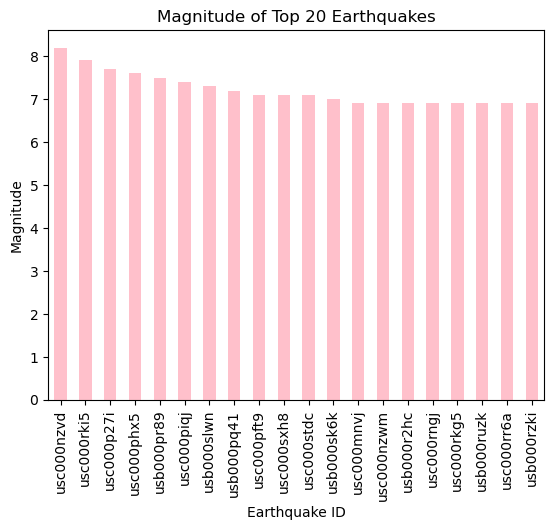

In [20]:
# b. create bar plot
top20.mag.plot(kind = 'bar', # barplot
               title = 'Magnitude of Top 20 Earthquakes', # update title
               ylabel = 'Magnitude', # update y-axis title
               xlabel = 'Earthquake ID', # update x-axis title
               color = 'pink'
              )

**c. The `top20` index in the graph became the labels on the x-axis. If we didn't update the index, the x-axis labels would just have been 0-19.**

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [21]:
# select the 20 largest earthquakes in place, magnitude, and depth columns
eqk[['depth', 'mag', 'place']].nlargest(20, 'mag')

,depth,mag,place
id,,,
usc000nzvd,25.00,8.2,"94km NW of Iquique, Chile"
usc000rki5,109.00,7.9,"19km SE of Little Sitkin Island, Alaska"
usc000p27i,22.40,7.7,"53km SW of Iquique, Chile"
usc000phx5,22.56,7.6,"93km SSE of Kirakira, Solomon Islands"
usb000pr89,43.37,7.5,"70km SW of Panguna, Papua New Guinea"
usc000piqj,39.00,7.4,"112km S of Kirakira, Solomon Islands"
usb000slwn,40.00,7.3,"74km S of Intipuca, El Salvador"
usb000pq41,24.00,7.2,"33km ESE of Petatlan, Mexico"
usc000pft9,60.53,7.1,"56km WSW of Panguna, Papua New Guinea"


# 9 

Without creating any new variables, visualize the locations of earthquakes with magnitude greater than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


<AxesSubplot:title={'center':'Location of Earthquakes With Magnitude Greater Than 5'}, xlabel='longitude', ylabel='latitude'>

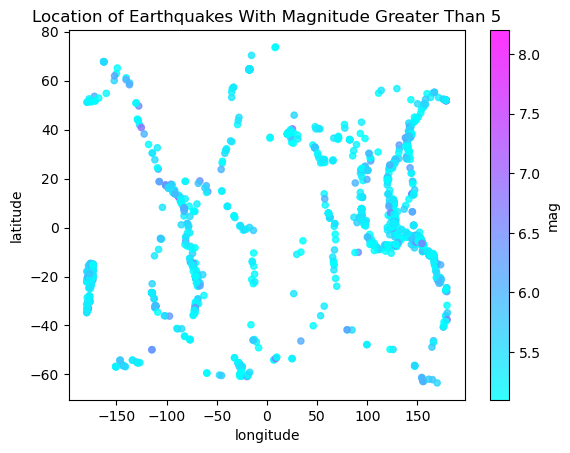

In [22]:
# solve exercise here
eqk[eqk['mag'] > 5].plot(kind = 'scatter', # scatter plot
                         x = 'longitude', # longitude is x axis variable
                         y = 'latitude', # latitude is y axis variable
                         title = 'Location of Earthquakes With Magnitude Greater Than 5', # update title
                         c = 'mag', # color is based on magnitude 
                         alpha = .8, # make points 80% transparent
                         colormap = 'cool' # change color of points
                        )